In [40]:
# https://github.com/ADPclass/ADP_book_ver01/tree/main 에 소스가 있으니 너무 길면 복사하면서 공부 가능

# 캐글의 보험가입자 데이터를 사용해 선형 회귀 모델 구현 
# 나이와 의료비용사이의 선형 모델 확인
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


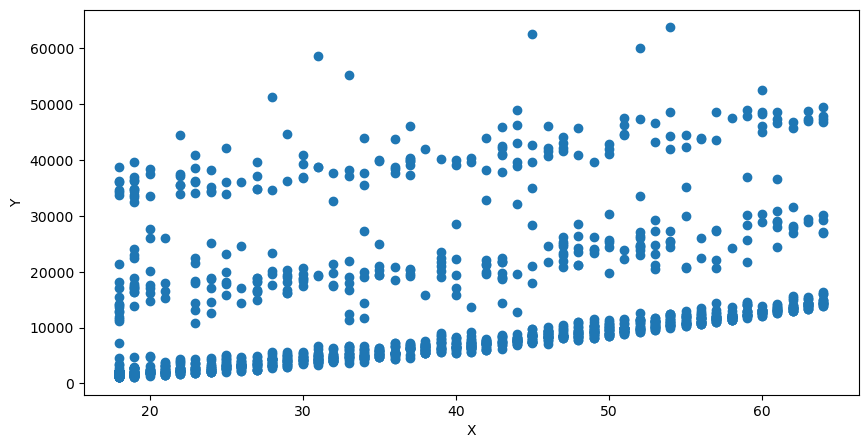

In [41]:
x = data['age']
y = data['charges']
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
# 그래프가 질서가 없어 보인다.

In [42]:
# fit()을 통하여 학습시킨다. 이 때 fit()에 입력하는 데이터는 2차원 array이여야 하므로 reshape()를 이용한다.
x = np.array(data['age'])
y = np.array(data['charges'])

# 2차원데이터로 차원을 맞춘다.
x = x.reshape(1338,1)
y = y.reshape(1338,1) 

lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [43]:
print("선형 회귀 모델 결과")
print("절편", lr.intercept_, "계수", lr.coef_)

선형 회귀 모델 결과
절편 [3165.89] 계수 [[257.72]]


In [44]:
# 결정계수 구하기 : 종속변수의 변동을 얼마나 잘 설명하는지 나타내는 지표
print(lr.score(x,y))

0.08940589967885804


In [45]:
# 19살, 64살에 의료비용을 얼마나 지출하는지 예측
x_new = [[19],[64]]  # 2차원
y_hat = lr.predict(x_new)
print(y_hat)  # 각각 약 8062, 19660달러 지출 예상

[[ 8062.61]
 [19660.13]]


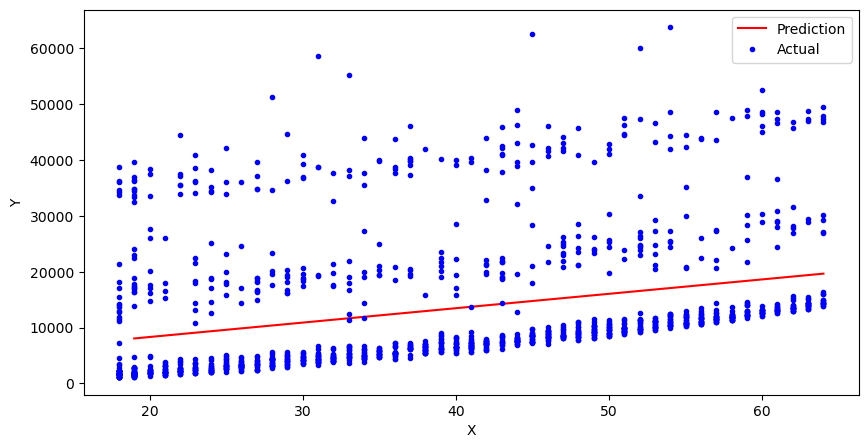

In [46]:
#  산점도 위에 회구선을 그어보자.
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, "-r", label="Prediction")  # -r : 빨간색 실선
plt.plot(x, y, "b.", label="Actual")              # b. : 파란색 점
plt.legend(loc='upper right')                     # 범례를 오른쪽 위에 표시
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [47]:
# 경사하강법
from sklearn.linear_model import SGDRegressor

x = np.array(data['age'])
y = np.array(data['charges'])
x = x.reshape(1338,1)
y = y.reshape(1338,1)

In [48]:
x, y

(array([[19],
        [18],
        [28],
        ...,
        [18],
        [21],
        [61]], dtype=int64),
 array([[16884.92],
        [ 1725.55],
        [ 4449.46],
        ...,
        [ 1629.83],
        [ 2007.94],
        [29141.36]]))

In [49]:
sgd_reg = SGDRegressor(max_iter=1000, random_state=200)
sgd_reg.fit(x, y.ravel())

SGDRegressor(random_state=200)

In [50]:
print("SGD 회귀 모델 결과")
print("절편", sgd_reg.intercept_, "계수", sgd_reg.coef_)

SGD 회귀 모델 결과
절편 [-507.07] 계수 [772.38]


In [51]:
# 새로운 데이터 샘플을 SGD 회귀 모델에 입력한 뒤 나이에 따른 의료비용을 예측해보자.
x_new = [[19],[64]]
y_hat = sgd_reg.predict(x_new)
print(y_hat)

[14168.16 48925.29]


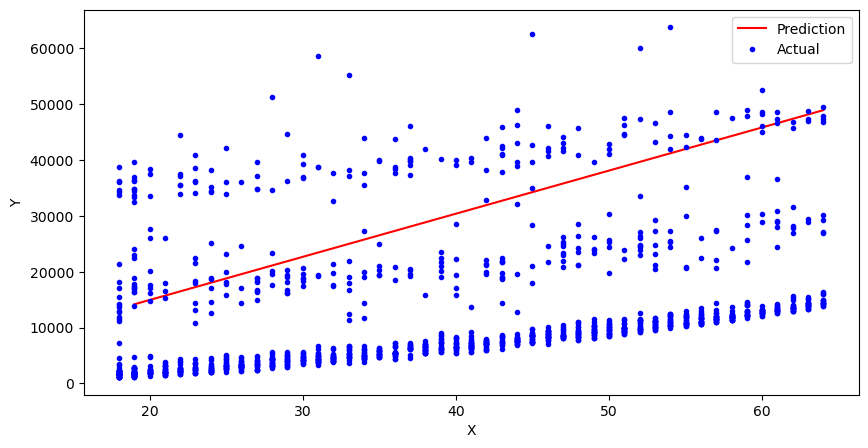

In [52]:
# SGD 선형 모델의 그림을 그려보자.
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, "-r", label="Prediction")  # -r : 빨간색 실선
plt.plot(x, y, "b.", label="Actual")              # b. : 파란색 점
plt.legend(loc='upper right')                     # 범례를 오른쪽 위에 표시
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [53]:
# 다항 회귀(Polynomial Regression) : 비선형의 형태를 가질 때의 모델
# 캐글의 80가지 시리얼 영양소 평가데이터를 통한 다항 회귀 분석
cereal = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cereal.csv")
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [54]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [55]:
cereal.shape

(77, 16)

In [56]:
cereal.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [57]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [58]:
cereal.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [59]:
# 첫 3개 열은 제외
cereal = cereal[cereal.columns[3:]]

In [60]:
# 설탕함유량(suger)가 0이상인 데이터만 추출
cereal = cereal[cereal.sugars >= 0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [61]:
# 산점도 : 설탕함유량에 대한 영양등급평가
cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by=['sugars'], inplace=True)
cereal2.reset_index(drop=True, inplace=True)  # 인덱스를 다시 매김
cereal2

C:\Users\kakaopaysec\AppData\Local\Temp\ipykernel_16356\124950331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal2.sort_values(by=['sugars'], inplace=True)


,sugars,rating
0,0,64.533816
1,0,60.756112
2,0,63.005645
3,0,93.704912
4,0,68.235885
...,...,...
71,14,37.840594
72,14,33.174094
73,14,28.592785
74,15,31.230054


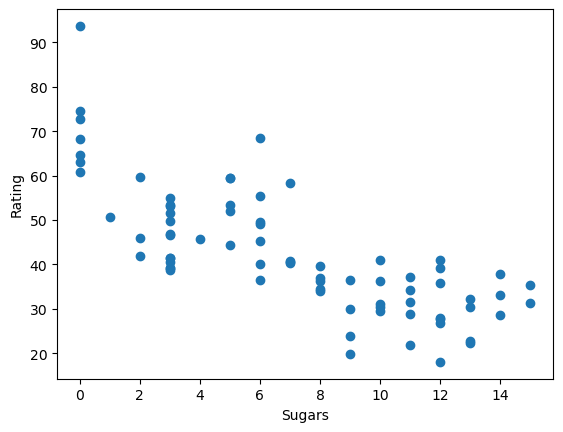

In [62]:
x = cereal2['sugars'].values
y = cereal2['rating'].values
plt.scatter(x,y)
plt.xlabel("Sugars")
plt.ylabel("Rating")
plt.show()

In [63]:
# 학습데이터와 평가데이터를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [64]:
# PolynomialFeatures를 이용하여 2차 다항식 모델 학습
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train.reshape(-1,1))

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [65]:
# 다항회귀모델 평가
import numpy as np
X_test_poly = poly_reg.transform(X_test.reshape(-1,1))
pred =  reg.predict(X_test_poly)

np.set_printoptions(precision=2)
print(np.concatenate((pred.reshape(len(pred),1),
                     y_test.reshape(len(y_test), 1)), 1))   # 예측값과 실제값을 합친뒤 출력

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [66]:
# 모델의 예측력 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test.reshape(-1,1)), y_test)  
# reshape(-1,1) : 1차원 배열을 2차원 배열의 “한 열(column)” 형태로 바꿀 때 사용

print("MAE\t{}".format(round(mae,3)))
print("RMSE\t{}".format(round(rmse,3)))
print("R2\t{}".format(round(acc*100,3)))


MAE	4.606
RMSE	5.794
R2	74.376


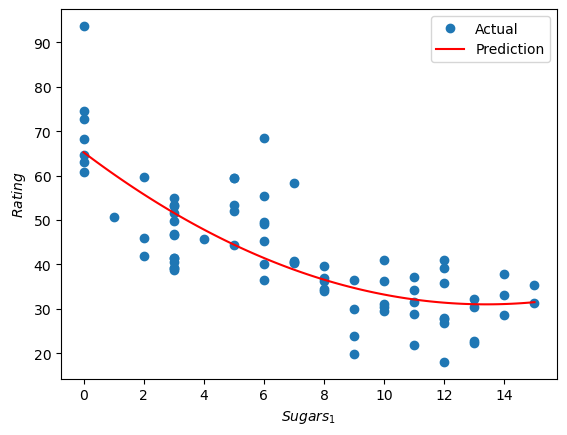

In [67]:
# 다항 회귀식 모델을 시각화
X_new =  np.linspace(0, 15, 100).reshape(100,1)
X_new_poly = poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)

plt.plot(x, y, 'o', label='Actual')
plt.plot(X_new, y_new, 'r-', label='Prediction')
plt.legend(loc='upper right')
plt.xlabel("$Sugars_1$")
plt.ylabel("$Rating$")
plt.show()

In [68]:
# 고차 다항 회귀분석 : 설명변수를 12개의 데이터로 설정하여 머신러닝 수행
X = cereal.iloc[:, :-1].values  # 마지막 열을 제외
y = cereal.iloc[:, -1].values   # 모든 행의 마지막 열

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53, 12) (23, 12) (53,) (23,)


In [69]:
# 표준정규화(스케일링) 단계를 추가한 뒤, 다항 변수 변환과 모델 적합 과정을 수행
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  # 평균 0, 표준편차 1
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

from sklearn.linear_model import LinearRegression
X_poly = poly_reg.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [70]:
# 예측력 확인
X_test_poly = poly_reg.transform(X_test)
pred = reg.predict(X_test_poly)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test), y_test)

print("MAE\t{}".format(round(mae,3)))
print("RMSE\t{}".format(round(rmse,3)))
print("R2\t{}".format(round(acc*100,3)))  # 정규화 시키니까 예측성능이 향상됨

MAE	2.152
RMSE	3.125
R2	92.509


In [71]:
# 릿지 회귀
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [72]:
from sklearn.linear_model import Ridge
import numpy as np
alpha = np.logspace(-3, 1, 5)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [73]:
data=[]
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a, random_state=45)
    ridge.fit(x, y)
    data.append(pd.Series(np.hstack([ridge.coef_])))
    print(i, a)

df_ridge=pd.DataFrame(data, index=alpha)
df_ridge.columns=x.columns
df_ridge

0 0.001
1 0.01
2 0.1
3 1.0
4 10.0


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.551414,-239.090354,520.363367,323.828627,-712.328205,413.383794,65.811629,167.513774,720.944468,68.122100
0.010,-7.199457,-234.552930,520.583136,320.523356,-380.607066,150.483752,-78.591232,130.313059,592.349587,71.133768
0.100,1.307349,-207.194814,489.691080,301.769437,-83.466074,-70.828096,-188.680164,115.712703,443.814054,86.748539
1.000,29.465746,-83.154885,306.351627,201.629434,5.909369,-29.515927,-152.040465,117.311715,262.944995,111.878718
10.000,19.812822,-0.918458,75.416167,55.025419,19.924600,13.948686,-47.553816,48.259420,70.144068,44.213876


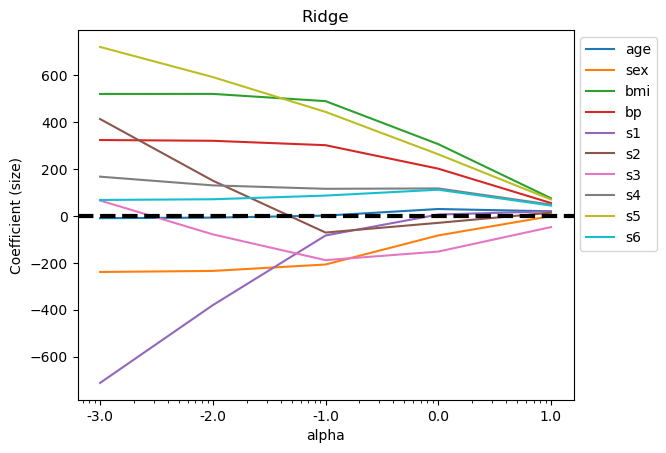

In [74]:
# alpha값이 증가하면서 회귀계수의 값이 0에 수렴하는지 시각화
# **Ridge 회귀의 규제 강도(α)**가 커질 때 회귀계수(coefficient)가 어떻게 변하는지 시각화
import matplotlib.pyplot as plt

plt.semilogx(df_ridge)  # x축은 로그 스케일, y축은 선형 스케일로 그래프를 그림
plt.xticks(alpha, labels=np.log10(alpha))  
# x축 tick 위치를 alpha 값에 맞추고 tick 라벨은 **log10(alpha)**로 표시 예: α = [0.01, 0.1, 1, 10] → 표시: [-2, -1, 0, 1]

plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1,1))
plt.title("Ridge")
plt.xlabel("alpha")
plt.ylabel("Coefficient (size)")
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

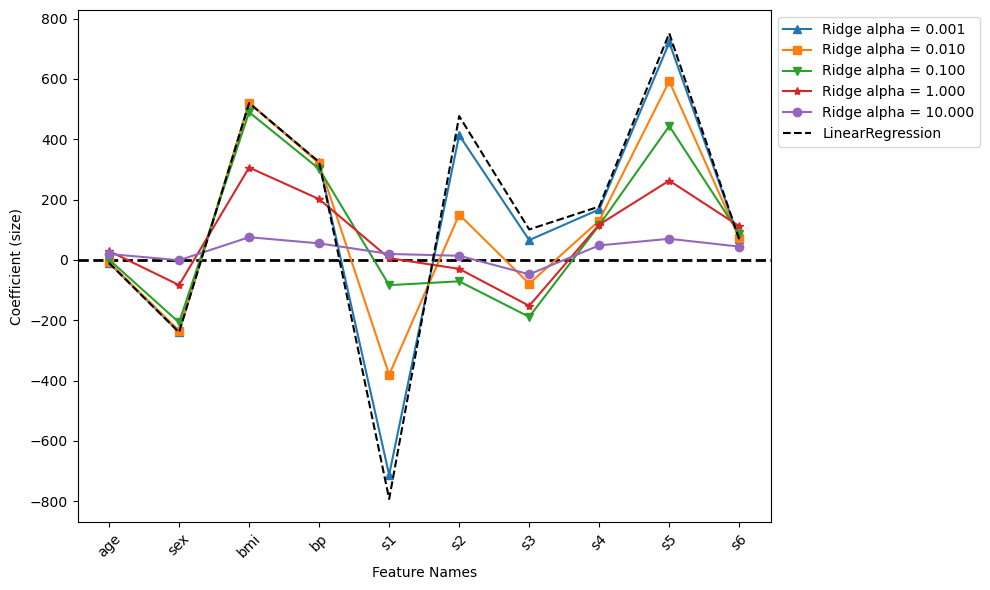

In [85]:
# 인덱스를 문자열로 통일 (소수 셋째자리까지)
df_ridge.index = df_ridge.index.map(lambda v: f"{float(v):.3f}")

plt.figure(figsize=(10,6))
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)

plt.plot(df_ridge.loc["0.001"], '^-', label='Ridge alpha = 0.001')
plt.plot(df_ridge.loc["0.010"], 's-', label='Ridge alpha = 0.010')
plt.plot(df_ridge.loc["0.100"], 'v-', label='Ridge alpha = 0.100')
plt.plot(df_ridge.loc["1.000"],  '*-', label='Ridge alpha = 1.000')
plt.plot(df_ridge.loc["10.000"], 'o-', label='Ridge alpha = 10.000')

# LinearRegression 계수
coef_lr = lr.coef_.ravel()
features = df_ridge.columns
plt.plot(features, coef_lr, 'k--', label='LinearRegression')

plt.xlabel("Feature Names")
plt.ylabel("Coefficient (size)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()



In [87]:
# 라쏘 회귀 모델 : 회수(sparse) 모델을 만들 수 있음
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd

alpha = np.logspace(-3, 1, 5)   # 0.001 ~ 10, 총 5개

coefs = []  # 각 alpha에서의 계수들을 저장할 리스트

for a in alpha:
    lasso = Lasso(alpha=a, random_state=45)
    lasso.fit(x, y)      # y가 Series면 OK, DataFrame이면 y.values.ravel() 추천
    coefs.append(lasso.coef_)   # 1차원 배열

# 1) 루프 끝난 뒤에 한 번만 DataFrame 생성
df_lasso = pd.DataFrame(coefs, index=alpha, columns=x.columns)

# 2) (선택) 인덱스를 문자열로 깔끔하게 만들고 싶으면
df_lasso.index = df_lasso.index.map(lambda v: f"{v:.3f}")

df_lasso


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.998449,-238.899740,520.261362,323.429484,-720.251734,421.405141,66.734168,164.448873,725.340440,67.475538
0.010,-1.306575,-228.822331,525.560658,316.175320,-307.013677,89.321688,-105.081398,119.597989,571.330871,65.007316
0.100,-0.000000,-155.362882,517.182017,275.082351,-52.540269,-0.000000,-210.159753,0.000000,483.914409,33.672821
1.000,0.000000,-0.000000,367.701852,6.301904,0.000000,0.000000,-0.000000,0.000000,307.605700,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


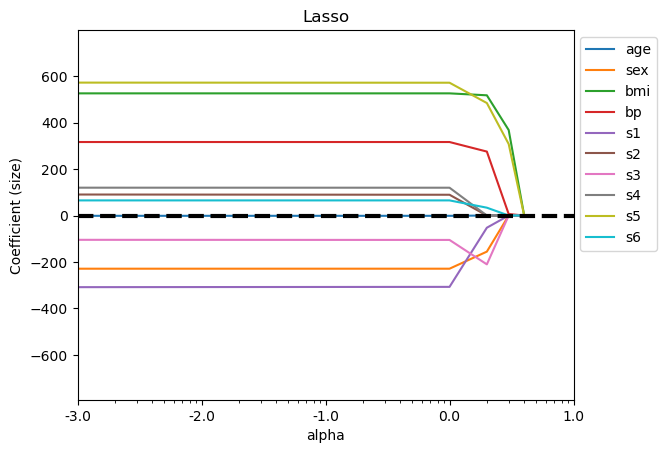

In [88]:
plt.semilogx(df_lasso)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels=df_lasso.columns, bbox_to_anchor=(1,1))
plt.title("Lasso")
plt.xlabel("alpha")
plt.ylabel("Coefficient (size)")
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

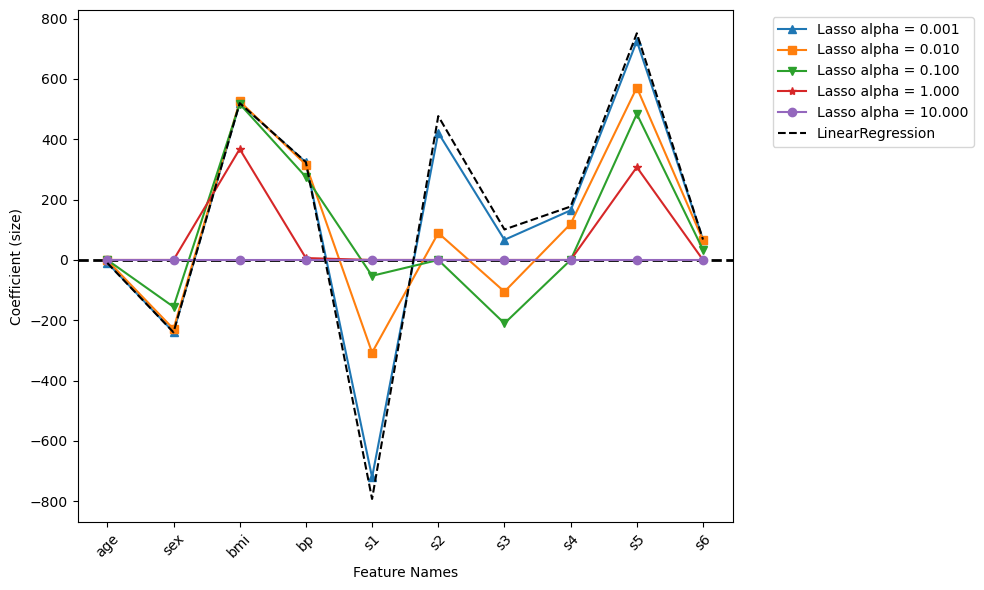

In [91]:
# MSE를 사용한 회귀모델과 비교
import matplotlib.pyplot as plt

# 1) 인덱스/컬럼 정리
features = df_lasso.columns          # 특성 이름
alphas   = df_lasso.index            # Lasso에서 사용한 alpha 값들

# (선택) 인덱스를 보기 좋게 문자열로 바꾸고 싶으면:
# df_lasso.index = df_lasso.index.map(lambda v: f"{float(v):.3f}")
# alphas = df_lasso.index

# 2) LinearRegression 계수 1차원으로 맞추기
lrcoef_ = lr.coef_.ravel()   # (n_features,) 형태로

plt.figure(figsize=(10,6))
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)

# 3) 여러 alpha에 대한 Lasso 계수 그리기
markers = ['^','s','v','*','o']  # alpha 개수에 맞춰서

for a, m in zip(alphas, markers):
    plt.plot(features, df_lasso.loc[a], m+'-', label=f"Lasso alpha = {a}")

# 4) LinearRegression 계수 같이 표시
plt.plot(features, lrcoef_, 'k--', label="LinearRegression")

plt.xlabel("Feature Names")
plt.ylabel("Coefficient (size)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [92]:
# 엘라스틱넷 : 릿지 회귀와 라쏘 회귀를 절충한 모델
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    ela = ElasticNet(alpha=a, l1_ratio=0.5, random_state=45)
    ela.fit(x, y)
    data.append(pd.Series(np.hstack([ela.coef_])))
    
df_ela = pd.DataFrame(data, index=alpha)
df_ela.columns = x.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.705295,-178.076275,450.881224,281.072686,-44.049984,-77.944846,-188.958313,119.794742,393.703478,98.943695
0.010,33.147202,-35.245609,211.023930,144.560115,21.931533,0.000000,-115.620017,100.658838,185.326334,96.257214
0.100,10.286327,0.285976,37.464643,27.544899,11.108850,8.355884,-24.120808,25.505488,35.465757,22.894981
1.000,0.359018,0.000000,3.259767,2.204356,0.528646,0.250935,-1.861363,2.114454,3.105841,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


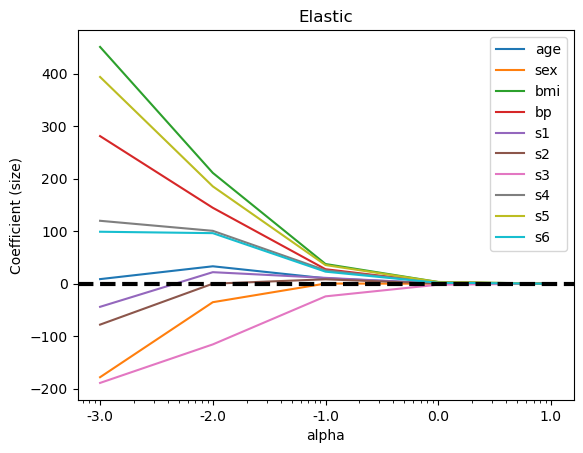

In [93]:
plt.semilogx(df_ela)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ela.columns, bbox_to_anchor=(1,1))
plt.title('Elastic')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

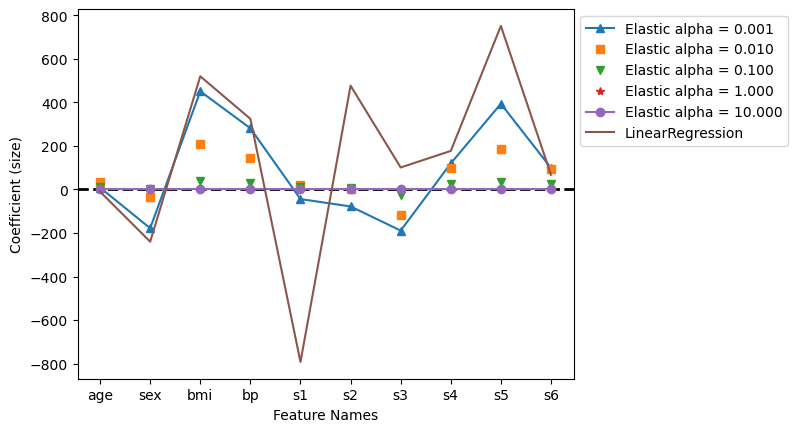

In [94]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ela.loc[0.001], '^-', label='Elastic alpha = 0.001')
plt.plot(df_ela.loc[0.010], 's', label='Elastic alpha = 0.010')
plt.plot(df_ela.loc[0.100], 'v', label='Elastic alpha = 0.100')
plt.plot(df_ela.loc[1.000], '*', label='Elastic alpha = 1.000')
plt.plot(df_ela.loc[10.000], 'o-', label='Elastic alpha = 10.000')

plt.plot(lr.coef_, label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
# alpha값이 증가하면서 회귀계수가 0이 되는 것을 확인할 수 있다.

In [96]:
# 로지스틱 회귀 : 반응변수가 범주형인 경우에 적용하는 회귀분석 모델
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [100]:
body = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/bodyPerformance.csv")
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [101]:
# gender 변수는 남자이면 0, 여자이면 1로 바꿈
# class 변수는 A인경우 1, 아니면 0으로 바꿈
body['gender'] = np.where(body['gender']=='M', 0, 1)
body['class_1'] = np.where(body['class']=='A', 1, 0)

In [102]:
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [104]:
# 설명변수 X와 종속변수 Y를 나눈뒤, 사이킷런의 train_test_split으로 학습데이터와 테스트데이터를 0.7:0.3의 비율로 나눈다.
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_1'])) 
# 두 개의 타깃 컬럼(class, class_1)을 제외하고 나머지 모든 feature만 자동으로 선택
feature_columns

['age',
 'body fat_%',
 'broad jump_cm',
 'diastolic',
 'gender',
 'gripForce',
 'height_cm',
 'sit and bend forward_cm',
 'sit-ups counts',
 'systolic',
 'weight_kg']

In [103]:
x =  body[feature_columns]
y = body['class_1']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify = y, train_size = .7, random_state = 1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [105]:
# LogisticRegression을 import한 뒤 모델에 데이터 학습시켜보자.
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(random_state=45)
logR.fit(train_x, train_y)

LogisticRegression(random_state=45)

In [107]:
proba = pd.DataFrame(logR.predict_proba(train_x))
cs = logR.decision_function(train_x)

df = pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns = ['Not A', 'A', 'decision_function']

df.sort_values(['decision_function'], inplace=True)
df.reset_index(inplace=True, drop=True)
df

,Not A,A,decision_function
0,1.000000,7.650021e-09,-18.688557
1,1.000000,4.092490e-08,-17.011527
2,1.000000,5.231594e-08,-16.765965
3,1.000000,5.411443e-08,-16.732165
4,1.000000,6.783213e-08,-16.506230
...,...,...,...
9370,0.001432,9.985675e-01,6.546921
9371,0.001405,9.985955e-01,6.566647
9372,0.001365,9.986346e-01,6.594961
9373,0.000447,9.995529e-01,7.712311


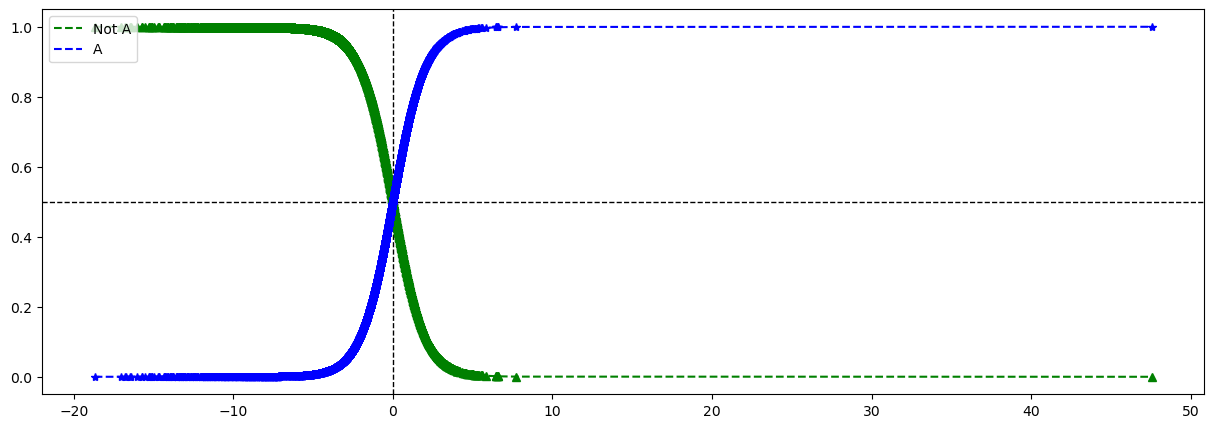

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label='Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.xlabel
plt.ylabel

plt.legend(loc='upper left')
plt.show()

In [109]:
# 모델 성능 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = logR.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print("\n")
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))


[[2764  250]
 [ 356  648]]


정확도	84.92%
정밀도	72.16%
재현율	64.54%
F1	68.14%


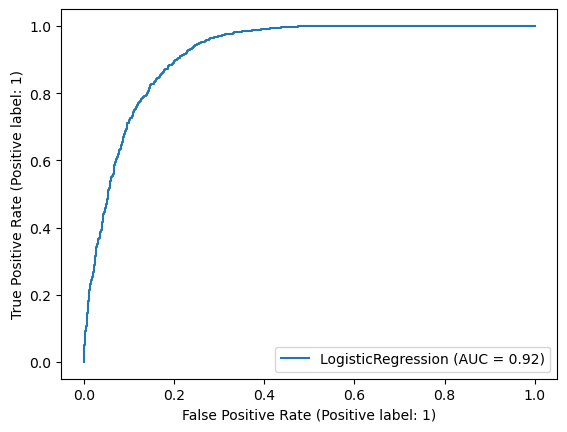

In [110]:
# ROC 커브와 AUC 시각화
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logR, test_x, test_y)
plt.show()

In [112]:
# 소프트맥스 회귀
body = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/bodyPerformance.csv")
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [118]:
# gender에서 남자는 0, 여자는 1로 변환
# class는 A : 0, B : 1, C : 2, d : 3으로 변환
body['gender'] = np.where(body['gender'] == 'M', 0, 1)
mapping = {'A':0, 'B':1, 'C':2, 'D':3}
body['class_2'] = body['class'].map(mapping)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class 2,class_2
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,1,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2,2
13389,21.0,1,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3,3
13390,39.0,1,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3,3


In [119]:
feature_columns = list(body.columns.difference(['class', 'class_2'])) 
# 두 개의 타깃 컬럼(class, class_1)을 제외하고 나머지 모든 feature만 자동으로 선택
feature_columns

['age',
 'body fat_%',
 'broad jump_cm',
 'class 2',
 'diastolic',
 'gender',
 'gripForce',
 'height_cm',
 'sit and bend forward_cm',
 'sit-ups counts',
 'systolic',
 'weight_kg']

In [120]:
x =  body[feature_columns]
y = body['class_2']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify = y, train_size = .7, random_state = 1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 12) (4018, 12) (9375,) (4018,)


In [121]:
# LogisticRegression에서 소프트맥스 회귀를 수행하기 위한 매개변수를 설정한뒤 fit 메서드로 데이터를 모델에 학습
from sklearn.linear_model import LogisticRegression

softm = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', random_state=45, C=10)
softm.fit(train_x, train_y)

LogisticRegression(C=10, multi_class='multinomial', random_state=45)

In [122]:
# 예측값을 pred에 저장, 혼동행렬과 정확도를 구해보자.
from sklearn.metrics import confusion_matrix, accuracy_score

pred = softm.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100, 2)))

[[730 256  18   0]
 [252 457 269  26]
 [ 75 208 544 178]
 [ 11  39 203 752]]


정확도	61.8%


In [123]:
softm.predict([test_x.iloc[-1, :]])

array([0], dtype=int64)

In [125]:
softm.predict_proba([test_x.iloc[-1,:]])

array([[7.90e-01, 1.87e-01, 2.28e-02, 3.57e-04]])

In [127]:
# 서포트 벡터 머신
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/classification.csv")
c

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


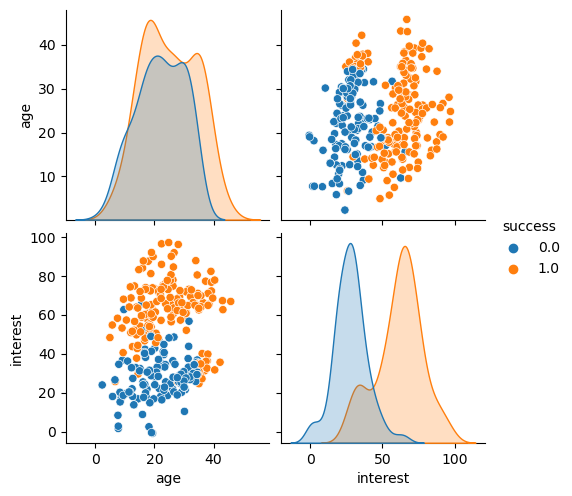

In [128]:
# 산점도
sns.pairplot(hue='success', data=c)

In [133]:
from sklearn.model_selection import train_test_split
x = c[['age', 'interest']]
y = c['success']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, train_size=.7, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(207, 2) (90, 2) (207,) (90,)


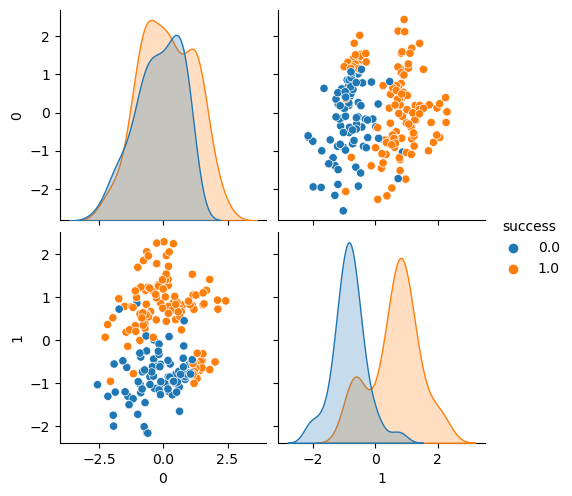

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

sns.pairplot(data=pd.concat([pd.DataFrame(train_x), train_y.reset_index(drop=True)], axis=1), hue='success')

In [135]:
from sklearn.svm import SVC

clf = SVC(C=.5, random_state=45)
clf.fit(train_x, train_y)

SVC(C=0.5, random_state=45)

In [136]:
# 테스트데이터로 모델평가 수행
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

test_x_scal = scaler.transform(test_x)

pred = clf.predict(test_x_scal)

# 1) 혼동행렬
test_cm = confusion_matrix(test_y, pred)

# 2) 성능 지표
test_acc  = accuracy_score(test_y, pred)
test_prc  = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1   = f1_score(test_y, pred)

# 출력
print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))


[[37  2]
 [ 2 49]]


정확도	95.56%
정밀도	96.08%
재현율	96.08%
F1	96.08%


In [137]:
# 테스트데이터로 모델평가 수행
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

test_x_scal = scaler.transform(test_x)

pred = clf.predict(test_x_scal)

# 1) 혼동행렬
test_cm = confusion_matrix(test_y, pred)

# 2) 성능 지표
test_acc  = accuracy_score(test_y, pred)
test_prc  = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1   = f1_score(test_y, pred)

# 출력
print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))


[[37  2]
 [ 2 49]]


정확도	95.56%
정밀도	96.08%
재현율	96.08%
F1	96.08%


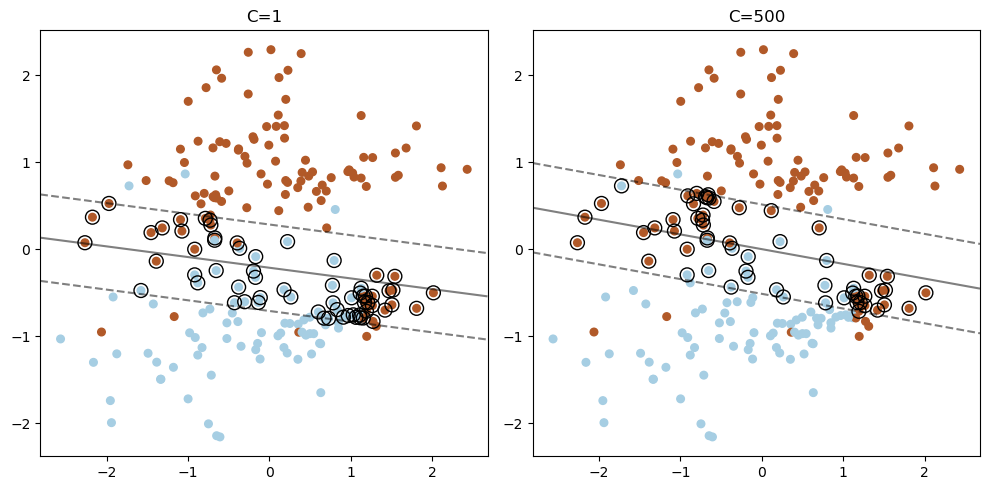

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 500]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(train_x, train_y)
    # decision function으로 서포트벡터 얻기
    decision_function = clf.decision_function(train_x)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = train_x[support_vector_indices]

    plt.subplot(1, 2, i +1)
    plt.scatter(train_x[:, 0], train_x[:, 1], c =train_y, s =30, cmap =plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(
        xx,
        yy,
        Z,
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C="+str(C))
plt.tight_layout()
plt.show()
# c값 : 정규화정도, 실제 분류에서 c값을 튜닝

In [53]:
# Support Vector Regression : 서포트벡터 방식으로 회귀분석
import numpy as np
# 샘플데이터 생성
X = np.sort(5 * np.random.rand(40, 1), axis=0)  # 0~1 사이의 난수 40개 생성 (40×1 배열)
y = np.sin(X).ravel()  # ravel : (40,1) 형태를 (40,) 형태의 1차원 배열로 변환

print(X[0:6], '\n\n', y[0:10])

[[0.00272982]
 [0.19996401]
 [0.24674473]
 [0.31776887]
 [0.56213659]
 [0.57830936]] 

 [0.00272982 0.19863406 0.24424859 0.31244792 0.53299522 0.546609
 0.71437545 0.79266408 0.86304454 0.87341516]


In [55]:
# 타깃데이터에 노이즈 추가
y[::5] += 3 * (0.5 - np.random.rand(8))
'''
1) y[::5]
y 배열에서 0, 5, 10, 15, ... 번째 요소만 선택
전체 y 길이가 40이므로 8개 요소 선택됨
(40 / 5 = 8)

2) np.random.rand(8)
0~1 사이 난수 8개 생성

3) (0.5 - np.random.rand(8))
각 난수가 0.5보다 크면 → 음수
작으면 → 양수
→ 즉, -0.5 ~ +0.5 범위의 무작위 값

4) 3 * (...)
범위가 -1.5 ~ +1.5 로 확대됨

5) y[::5] += ...
선택된 y의 8개 위치에
-1.5 ~ 1.5 사이의 랜덤값을 더함

➡ 일부 y값에 강한 노이즈(outlier) 를 추가하는 효과
'''
print(y[0:10])

[0.24840219 0.19863406 0.24424859 0.31244792 0.53299522 1.52775493
 0.71437545 0.79266408 0.86304454 0.87341516]


In [57]:
# 사이킷런의 SVR을 임포트한 뒤 파라미터를 설정해 추정기 생성하고 fit으로 데이터 학습
# 랜덤포레스트(rbf), 선형회귀(linear), 다항회귀(poly)로 학습
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(X, y)
svr_lin.fit(X, y)
svr_poly.fit(X, y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [58]:
# predict()로 예측값 생성
rbf_pred = svr_rbf.predict(X)
lin_pred = svr_lin.predict(X)
poly_pred = svr_poly.predict(X)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random_Forest', 'Linear', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=kernel, columns=evls)

for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y,pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)

    results.loc[nm,'mse'] = round(mse, 2)
    results.loc[nm,'rmse'] = round(rmse, 2)
    results.loc[nm,'mae'] = round(mae, 2)

results

,mse,rmse,mae
Random_Forest,0.12,0.34,0.19
Linear,0.28,0.53,0.39
Polynomial,0.12,0.35,0.19


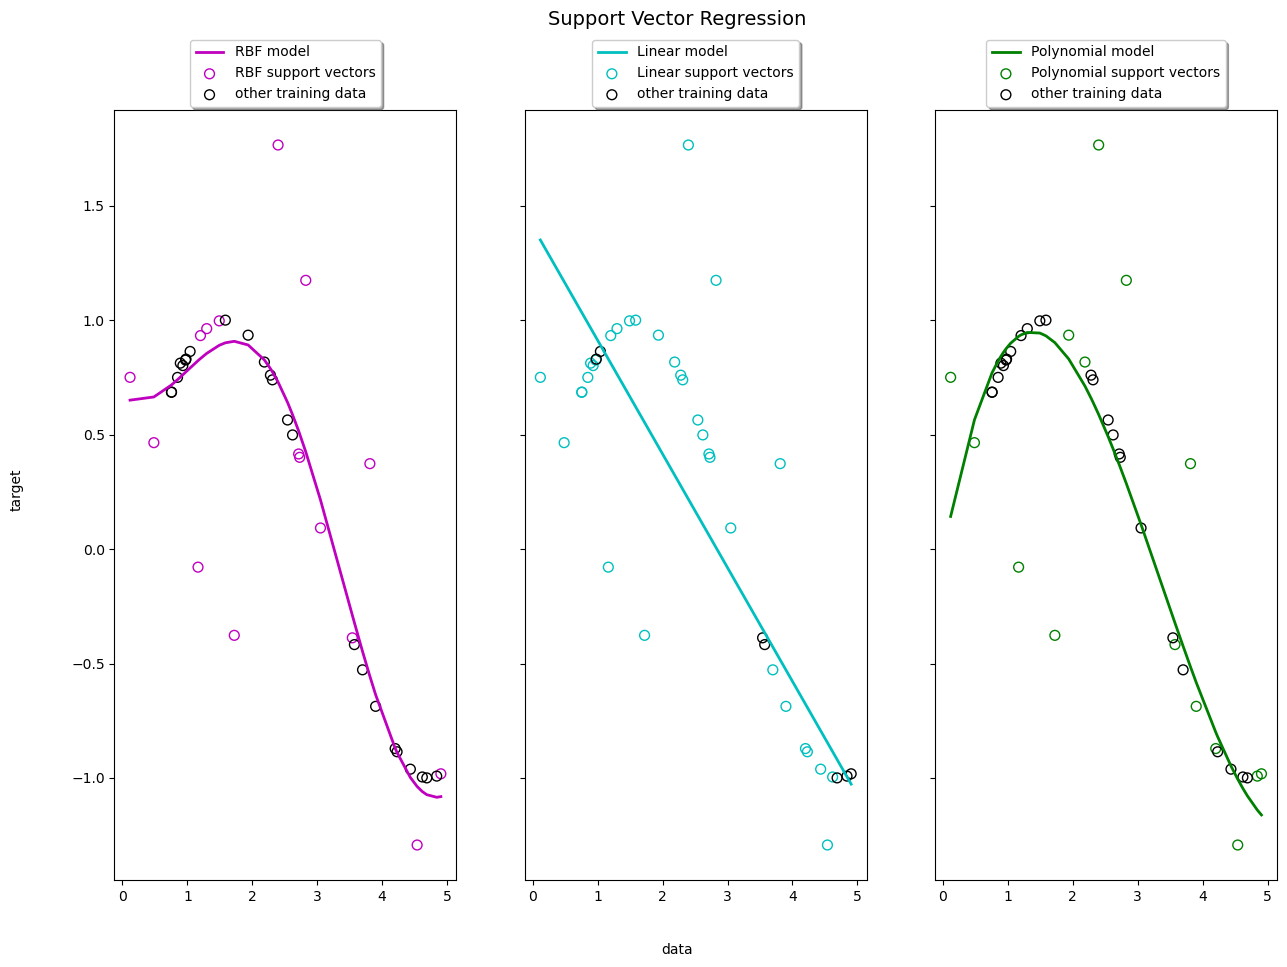

In [15]:
import matplotlib.pyplot as plt
lw =2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

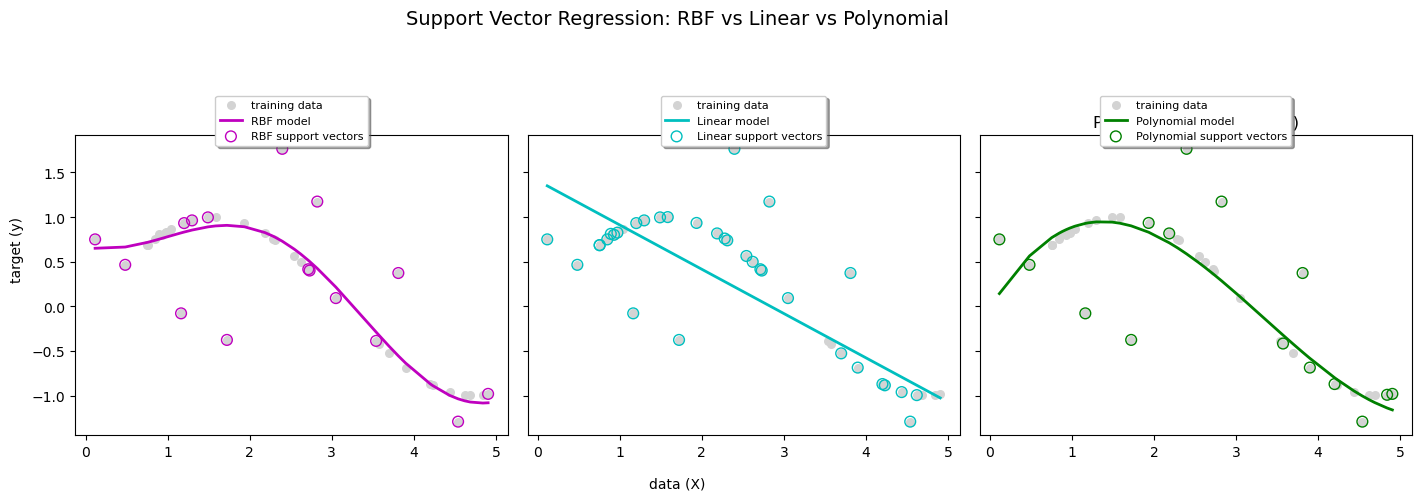

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

lw = 2

# ─────────────────────────
# 1. SVR 모델은 미리 학습해 둔다고 가정
#    svr_rbf, svr_lin, svr_poly 가 이미 fit 된 상태
# ─────────────────────────
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

# 각 모델별 예측값 미리 계산
preds = [svr.predict(X) for svr in svrs]

# ─────────────────────────
# 2. 그래프 그리기
# ─────────────────────────
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

for ix, (svr, y_pred) in enumerate(zip(svrs, preds)):
    ax = axes[ix]

    # (1) 원 데이터 전체 산점도 (회색 점)
    ax.scatter(
        X,
        y,
        color="lightgray",
        s=30,
        label="training data",
        zorder=1
    )

    # (2) SVR 회귀 곡선
    ax.plot(
        X,
        y_pred,
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
        zorder=2
    )

    # (3) 서포트 벡터
    ax.scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=60,
        label="{} support vectors".format(kernel_label[ix]),
        zorder=3
    )

    # (4) MSE 계산해서 제목에 표시
    mse = mean_squared_error(y, y_pred)
    ax.set_title(f"{kernel_label[ix]} (MSE={mse:.3f})")

    # (5) 범례
    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.15),
        ncol=1,
        fancybox=True,
        shadow=True,
        fontsize=8
    )

# 공통 라벨 & 전체 제목
fig.text(0.5, 0.03, "data (X)", ha="center", va="center")
fig.text(0.06, 0.5, "target (y)", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression: RBF vs Linear vs Polynomial", fontsize=14)

plt.tight_layout(rect=[0.06, 0.05, 1, 0.93])
plt.show()


In [19]:
# 여러모델 비교
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# 1) 데이터 생성 (사인 + 일부 이상치)
# -----------------------------
np.random.seed(42)

X = np.sort(5 * np.random.rand(40, 1), axis=0)  # 0~5 구간 40개
y = np.sin(X).ravel()

# 8개의 점에 강한 노이즈 추가 (outlier)
y[::5] += 3 * (0.5 - np.random.rand(8))

# -----------------------------
# 2) 여러 모델 정의
# -----------------------------
models = {}

# (1) Linear Regression
models["LinearRegression"] = LinearRegression()

# (2) Polynomial Regression (degree=3 예시, 필요시 바꾸셔도 됩니다)
poly_degree = 3
models[f"PolyRegression(d={poly_degree})"] = Pipeline([
    ("poly", PolynomialFeatures(degree=poly_degree)),
    ("lin", LinearRegression())
])

# (3) SVR - RBF / Linear / Polynomial
models["SVR_RBF"] = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
models["SVR_Linear"] = SVR(kernel="linear", C=100, epsilon=0.1)
models["SVR_Poly"] = SVR(kernel="poly", C=100, degree=3, epsilon=0.1, coef0=1)

# (4) Random Forest
models["RandomForest"] = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    random_state=42
)

# (5) Gradient Boosting
models["GradientBoosting"] = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

# (6) KNN Regressor
models["KNN(k=5)"] = KNeighborsRegressor(
    n_neighbors=5,
    weights="distance"
)

# -----------------------------
# 3) 학습 + 예측 + 성능평가
# -----------------------------
metrics = ["mse", "rmse", "mae", "r2"]
results = pd.DataFrame(index=models.keys(), columns=metrics)
pred_dict = {}  # 나중에 그래프 그릴 때 쓰기 위해 예측값 저장

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    pred_dict[name] = y_pred
    
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    results.loc[name, "mse"]  = round(mse, 3)
    results.loc[name, "rmse"] = round(rmse, 3)
    results.loc[name, "mae"]  = round(mae, 3)
    results.loc[name, "r2"]   = round(r2, 3)

print("=== 모델별 성능 비교 ===")
print(results)


=== 모델별 성능 비교 ===
                       mse   rmse    mae     r2
LinearRegression     0.235  0.484  0.382  0.611
PolyRegression(d=3)  0.138  0.372  0.224  0.771
SVR_RBF               0.14  0.375  0.192  0.767
SVR_Linear            0.24   0.49  0.372  0.602
SVR_Poly             0.144  0.379  0.196  0.762
RandomForest         0.042  0.204  0.128  0.931
GradientBoosting       0.0  0.018  0.012  0.999
KNN(k=5)               0.0    0.0    0.0    1.0


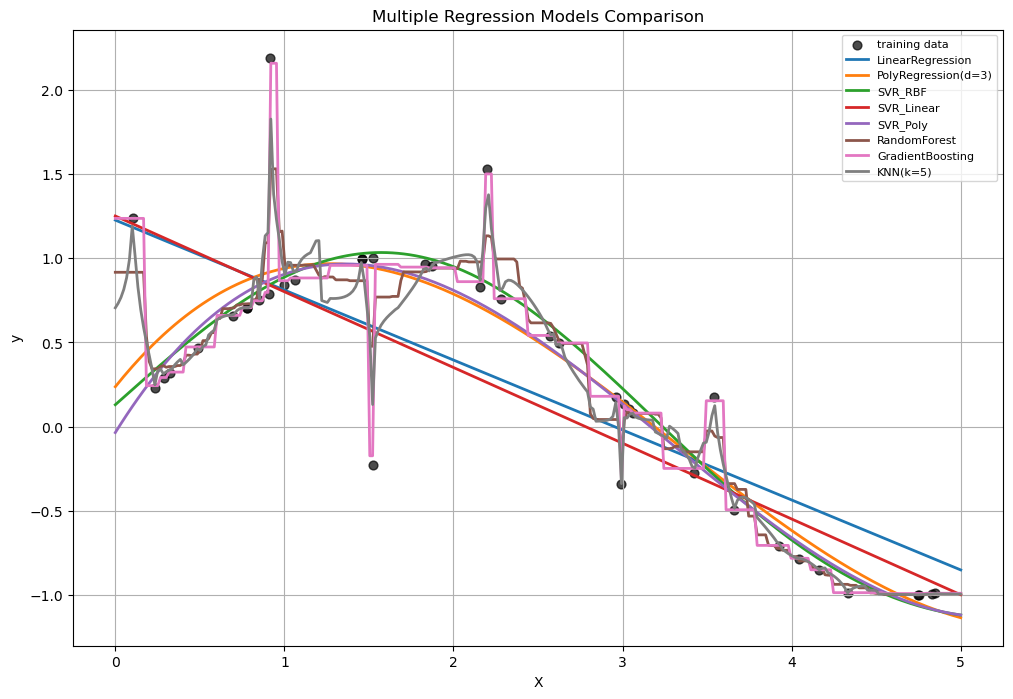

In [21]:
# -----------------------------
# 4) 곡선 시각화를 위한 촘촘한 X_grid 준비
# -----------------------------
X_grid = np.linspace(0, 5, 300).reshape(-1, 1)

plt.figure(figsize=(12, 8))

# (1) 원 데이터 산점도
plt.scatter(X, y, color="k", s=40, label="training data", alpha=0.7)

# (2) 각 모델 곡선
colors = [
    "tab:blue", "tab:orange", "tab:green", "tab:red",
    "tab:purple", "tab:brown", "tab:pink", "tab:gray"
]

for (name, model), color in zip(models.items(), colors):
    y_curve = model.predict(X_grid)
    plt.plot(X_grid, y_curve, color=color, lw=2, label=name)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Multiple Regression Models Comparison")
plt.legend(loc="upper right", fontsize=8)
plt.grid(True)
plt.show()
'''
검은 점: 원래 (노이즈 포함된) 데이터

각 색색의 선:
Linear, Polynomial, SVR(RBF/Linear/Poly), RandomForest, GradientBoosting, KNN 의 예측 곡선

이 곡선 모양 + 위의 성능 테이블을 같이 보시면,

어떤 모델이 오버피팅(너무 우글우글)

어떤 모델이 언더피팅(너무 직선에 가까움)

어떤 모델이 사인 곡선을 가장 자연스럽게 잘 따라가는지
직관적으로 보실 수 있습니다.
'''

In [3]:
# knn 분류
import pandas as pd
liver = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/indian_liver_patient.csv")
print(liver.Dataset.unique())
print(liver.head())

[1 2]
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90    

In [5]:
'''
간질환자 데이터세트는 Dataset 변수가 1인 행을 간암환자로, 2인 행을 비환자로 구분
Dataset 변수가 2이면 0으로 바꾼다. 성별(Gender)는 one-hot encoding한다.
'''
import numpy as np
liver.Dataset = np.where(liver.Dataset == 2, 0, 1)
liver.Gender = np.where(liver.Gender == 'Female', 0, 1)
print(liver.head())

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

In [7]:
print(liver.isna().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [9]:
# 결측치가 적으므로 결측치를 제거
liver.dropna(axis=0, inplace=True)
print(liver.isna().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [11]:
from sklearn.model_selection import train_test_split

x = liver[liver.columns.difference(['Dataset'])]
y = liver['Dataset']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify = y, train_size=.7, random_state = 1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(405, 10) (174, 10) (405,) (174,)


In [15]:
# knn 분류기 생성 및 학습
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 15, weights = 'uniform')
clf.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=15)

In [17]:
# predict메서드를 통해 test데이터를 입력한 뒤 예측값을 pred에 저장
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print("\n")
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))

[[14 36]
 [27 97]]


정확도	63.79%
정밀도	72.93%
재현율	78.23%
F1	75.49%


In [33]:
# 임의의 데이터로 knn을 사용한 회귀분석 실행 : 임의의 데이터를 생성한후 y값에 노이즈를 추가한다.
import numpy as np

np.random.seed(0)
X = np.sort(5 * np.random.rand(400, 1), axis = 0)  # 0~1 사이 난수 400개를 만들고 5를 곱해 0~5사이 난수를 만듦
T = np.linspace(0, 5, 500)[:, np.newaxis]          # 0에서 5까지 500개의 점
y = np.sin(X).ravel()

print(X[:10])
print(T[:10])
print(y[:10])

[[0.02347738]
 [0.05713729]
 [0.05857042]
 [0.06618429]
 [0.08164251]
 [0.08214815]
 [0.09260897]
 [0.093949  ]
 [0.09596599]
 [0.10053773]]
[[0.        ]
 [0.01002004]
 [0.02004008]
 [0.03006012]
 [0.04008016]
 [0.0501002 ]
 [0.06012024]
 [0.07014028]
 [0.08016032]
 [0.09018036]]
[0.02347522 0.05710621 0.05853694 0.06613598 0.08155185 0.08205579
 0.09247665 0.09381086 0.09581876 0.10036845]


In [35]:
# 타깃데이터에 노이즈를 추가
y[::1] += 1 * (0.5 - np.random.rand(400))  # y값에 평균 0, 분포 [-0.5, 0.5]의 균일분포(Uniform) 노이즈를 더해 더 “흩어진 데이터”로 만듦
y[:10]

array([ 0.12221572, -0.37218521,  0.45892201, -0.37916555, -0.28793668,
        0.12789339,  0.26577577,  0.36106673, -0.01864595,  0.56729386])

In [39]:
# 데이터를 7:3의 비율로 학습데이터와 평가데이터로 나누어 준다.
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=.7, random_state = 1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(280, 1) (120, 1) (280,) (120,)


In [41]:
# KNeighborRegression을 이용해서 weights를 다르게 적용한 KNN 추정기를 생성하고 fit() 메서드로 데이터를 학습
from sklearn.neighbors import KNeighborsRegressor

knn_uni = KNeighborsRegressor(n_neighbors = 20, weights = 'uniform')
knn_dis = KNeighborsRegressor(n_neighbors = 20, weights = 'distance')

knn_uni.fit(train_x, train_y)
knn_dis.fit(train_x, train_y)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [45]:
# predict 메서드로 평가데이터를 적용해 KNN 모델에서 예측한 값을 각각 uni_pred, dis_pred값에 저장, 비교
uni_pred = knn_uni.predict(test_x)
dis_pred = knn_dis.predict(test_x)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

preds = [uni_pred, dis_pred]
weights = ['uniform', 'distance']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=weights, columns=evls)

for pred, nm in zip(preds, weights):
    mse = mean_squared_error(test_y, pred)
    mae = mean_absolute_error(test_y, pred)
    rmse = np.sqrt(mse)

    results.loc[nm, 'mse'] = round(mse, 2)
    results.loc[nm, 'rmse'] = round(rmse, 2)
    results.loc[nm, 'mae'] = round(mae, 2)

results
                           

,mse,rmse,mae
uniform,0.1,0.31,0.27
distance,0.11,0.34,0.28


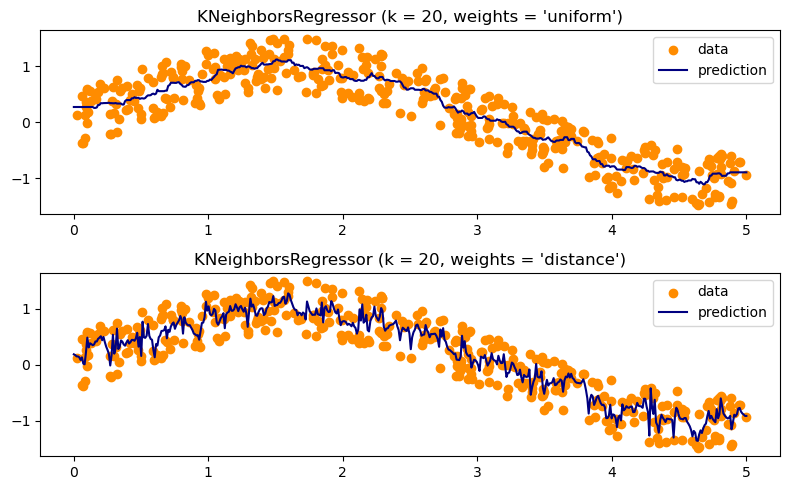

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for i, weights in enumerate(["uniform", "distance"]):
'''
weights:
"uniform": 20개 이웃을 동일 가중치로 평균
"distance": 가까운 이웃에 더 높은 가중치 부여
'''
    knn=KNeighborsRegressor(n_neighbors=20, weights=weights)
    
    y_ = knn.fit(X, y).predict(T)
    
    plt.subplot(2, 1, i +1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (20, weights))

plt.tight_layout()
plt.show()
'''
결과 해석

"uniform"
→ 곡선이 더 부드럽고 완만함
→ 멀리 있는 점도 동일 가중치이므로 영향을 받음

"distance"
→ 데이터의 세부적인 요동을 더 세밀하게 반영
→ 가까운 점이 큰 영향 → 지역적(local) 패턴에 민감
'''

In [1]:
# 의사결정 나무
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

credit = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/credit_final.csv")
credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [2]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

In [3]:
credit.isna().sum()

credit.rating                     0
account.balance                   0
credit.duration.months            0
previous.credit.payment.status    0
credit.purpose                    0
credit.amount                     0
savings                           0
employment.duration               0
installment.rate                  0
marital.status                    0
guarantor                         0
residence.duration                0
current.assets                    0
age                               0
other.credits                     0
apartment.type                    0
bank.credits                      0
occupation                        0
dependents                        0
telephone                         0
foreign.worker                    0
dtype: int64

In [4]:
# 설명변수 X와 종속변수 y를 분리
feature_columns = list(credit.columns.difference(['credit.rating']))
X = credit[feature_columns]
y = credit['credit.rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 20) (300, 20) (700,) (300,)


In [5]:
# 사이킷런의 DecisionTreeClassifier 모델을 학습
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [6]:
# 모델 성능 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print("\n")
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))

[[ 28  62]
 [ 27 183]]


정확도	70.33%
정밀도	74.69%
재현율	87.14%
F1	80.44%


In [7]:
# classification_report를 통해 결정트리의 분석결과 확인
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.31      0.39        90
           1       0.75      0.87      0.80       210

    accuracy                           0.70       300
   macro avg       0.63      0.59      0.60       300
weighted avg       0.68      0.70      0.68       300



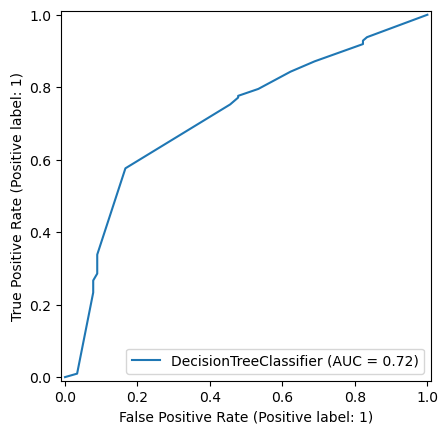

ROC_AUC_score :  0.717857142857143


In [8]:
# ROC 곡선
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_roc_curve, roc_auc_score  # 최신버전에서 아래와 같이 바뀌었음
from sklearn.metrics import RocCurveDisplay, roc_auc_score
#plot_roc_curve(clf, X_test, y_test)                         # 최신버전에서 아래와 같이 바뀌었음
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()
R_A_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print("ROC_AUC_score : ", R_A_score)

In [9]:
# 중요한 변수가 무엇이었는지 확인
importances = clf.feature_importances_
column_nm = pd.DataFrame(X.columns)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

                        feature_nm  importances
0                  account.balance     0.263282
1                              age     0.099625
2                   apartment.type     0.048656
3                     bank.credits     0.000000
4                    credit.amount     0.095584
5           credit.duration.months     0.187908
6                   credit.purpose     0.059083
7                   current.assets     0.000000
8                       dependents     0.000000
9              employment.duration     0.000000
10                  foreign.worker     0.000000
11                       guarantor     0.000000
12                installment.rate     0.000000
13                  marital.status     0.013993
14                      occupation     0.000000
15                   other.credits     0.034003
16  previous.credit.payment.status     0.123825
17              residence.duration     0.020960
18                         savings     0.053080
19                       telephone     0

In [10]:
# 🔽 중요도가 높은 순서대로 정렬
feature_importances = feature_importances.sort_values(by='importances', ascending=False)
print(feature_importances)

                        feature_nm  importances
0                  account.balance     0.263282
5           credit.duration.months     0.187908
16  previous.credit.payment.status     0.123825
1                              age     0.099625
4                    credit.amount     0.095584
6                   credit.purpose     0.059083
18                         savings     0.053080
2                   apartment.type     0.048656
15                   other.credits     0.034003
17              residence.duration     0.020960
13                  marital.status     0.013993
14                      occupation     0.000000
10                  foreign.worker     0.000000
12                installment.rate     0.000000
11                       guarantor     0.000000
9              employment.duration     0.000000
8                       dependents     0.000000
7                   current.assets     0.000000
3                     bank.credits     0.000000
19                       telephone     0

In [14]:
# 결정트리의 분류 의사결정 시각화
import numpy as np
feature_names = feature_columns
target_names = np.array(['0', '1'])

import pydot
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
dt_dot_data = export_graphviz(clf, feature_names = feature_names, class_names = target_names, 
                              filled = True, rounded = True, special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

from IPython.display import Image
Image(dt_graph.create_png())

ModuleNotFoundError: No module named 'graphviz'

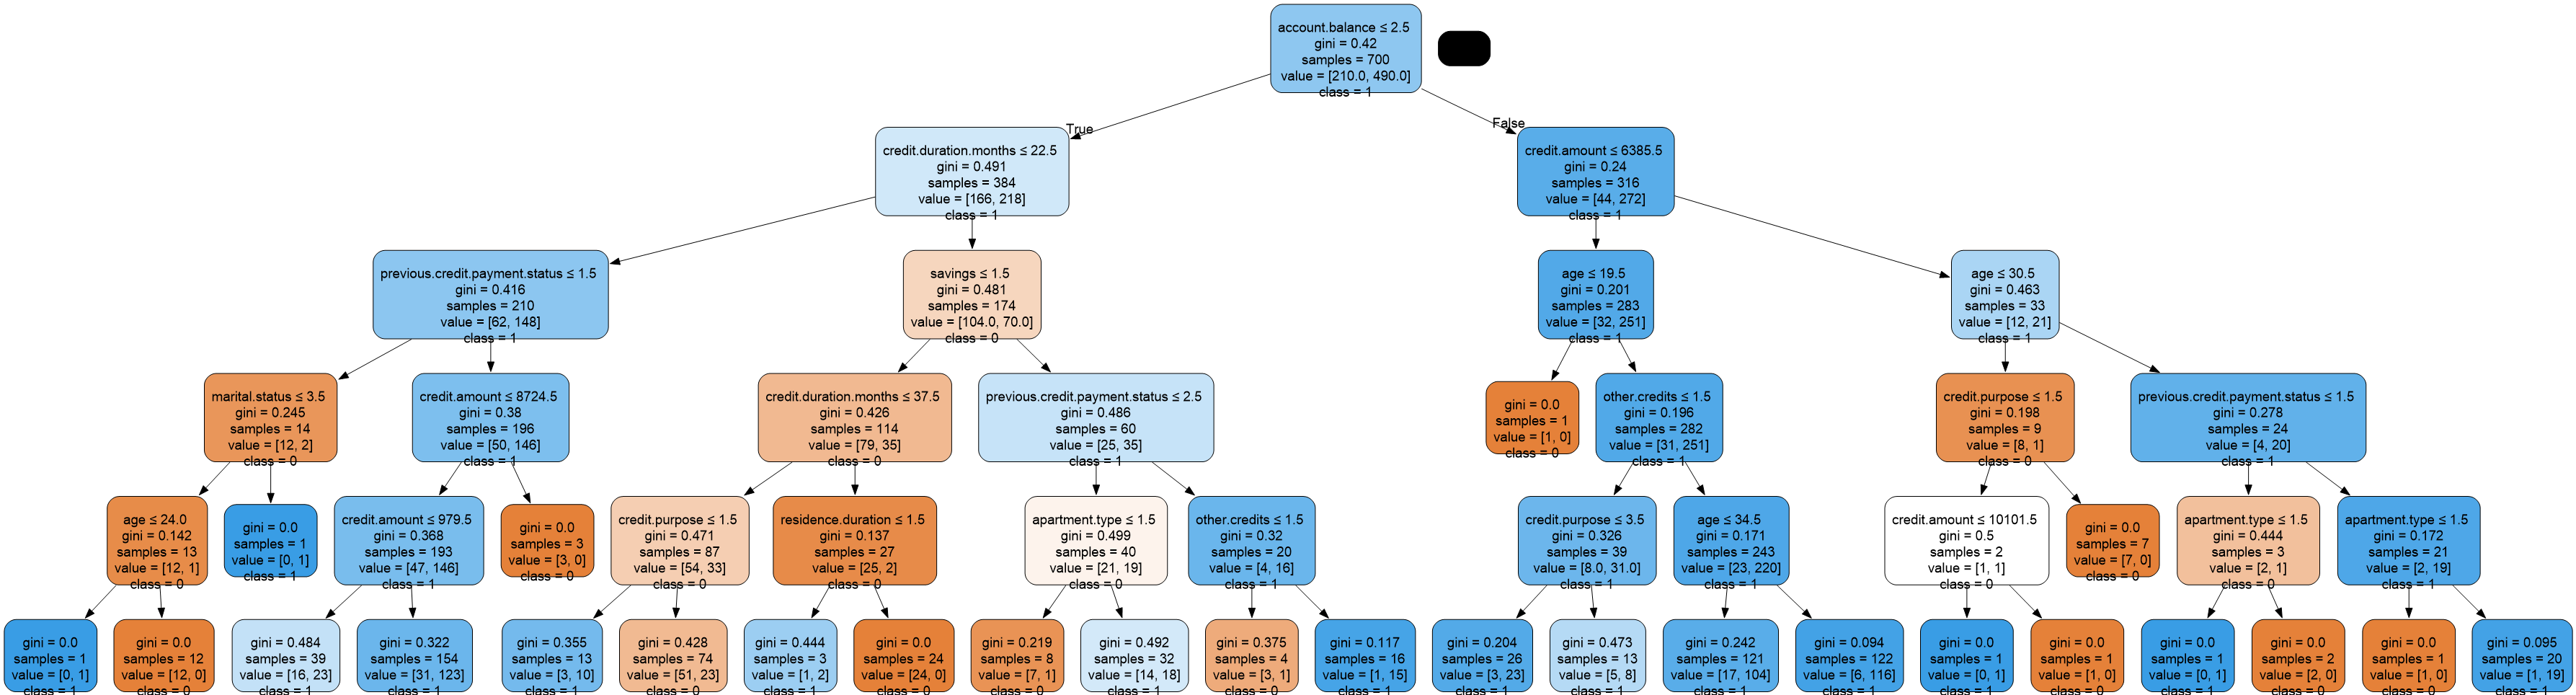

In [17]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

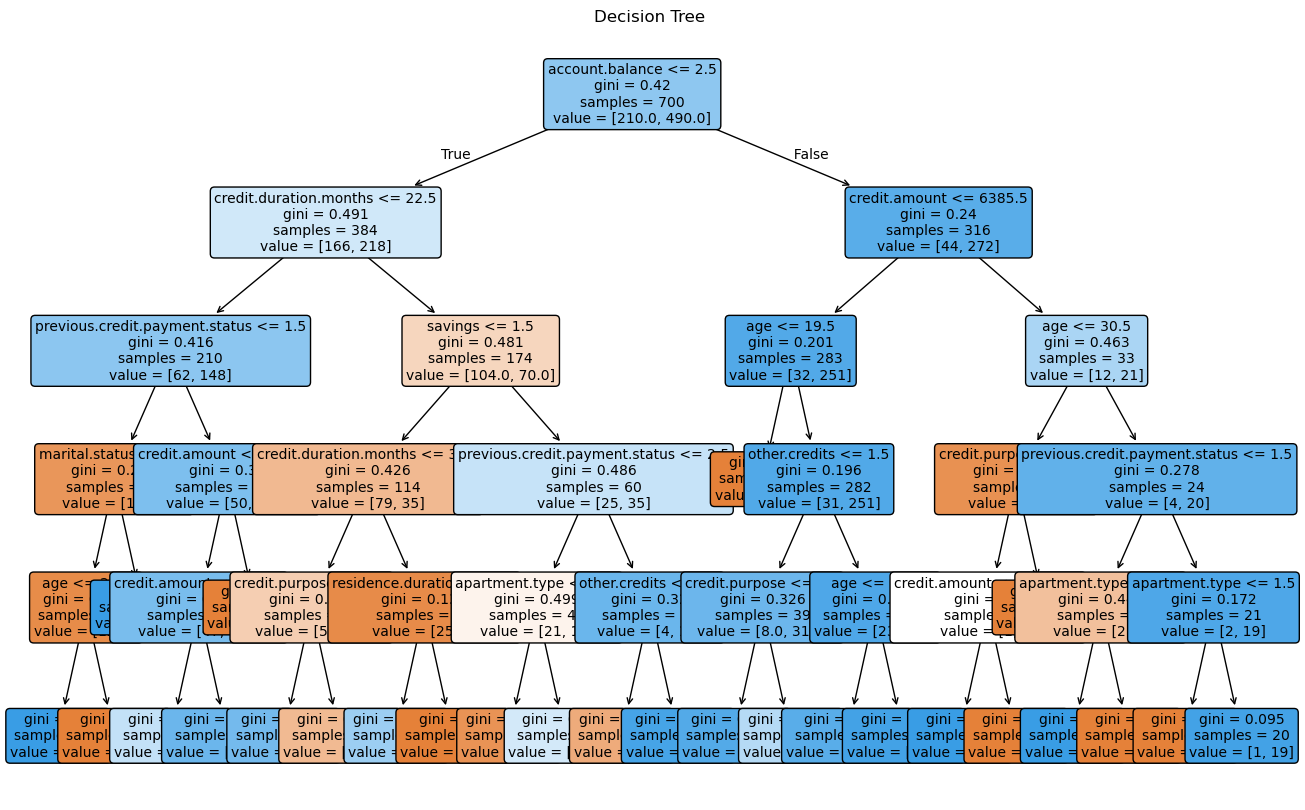

In [27]:
# matplotlib.pyplot으로만 그림을 그리는 버
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# clf: 이미 학습된 DecisionTreeClassifier 또는 DecisionTreeRegressor
# feature_names: X의 컬럼 이름 리스트 또는 array
# class_names: 분류일 때만 사용 (회귀면 빼도 됨)

plt.figure(figsize=(16, 10))  # figure size

plot_tree(
    clf,
    feature_names=feature_names,   # e.g. X.columns
    #class_names=class_names,      # 분류가 아닐 경우 생략 또는 None
    filled=True,                  # node 색으로 클래스/값 표시
    rounded=True,                 # 둥근 박스
    fontsize=10,                  # 글자 크기
)

plt.title("Decision Tree")
plt.show()

In [31]:
# 간단히 텍스트로 트리구조 보는 버전
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=list(feature_names))
print(tree_rules)

|--- account.balance <= 2.50
|   |--- credit.duration.months <= 22.50
|   |   |--- previous.credit.payment.status <= 1.50
|   |   |   |--- marital.status <= 3.50
|   |   |   |   |--- age <= 24.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  24.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- marital.status >  3.50
|   |   |   |   |--- class: 1
|   |   |--- previous.credit.payment.status >  1.50
|   |   |   |--- credit.amount <= 8724.50
|   |   |   |   |--- credit.amount <= 979.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- credit.amount >  979.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- credit.amount >  8724.50
|   |   |   |   |--- class: 0
|   |--- credit.duration.months >  22.50
|   |   |--- savings <= 1.50
|   |   |   |--- credit.duration.months <= 37.50
|   |   |   |   |--- credit.purpose <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- credit.purpose >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- credit.duration.

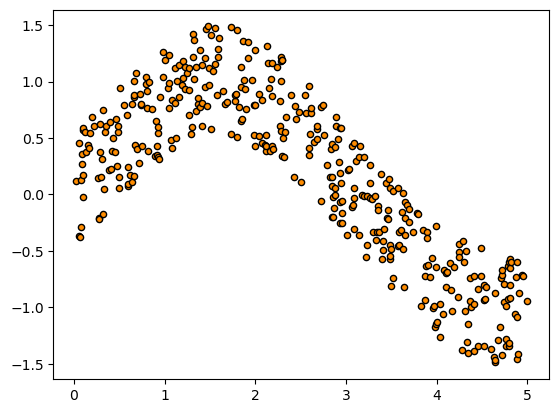

In [19]:
# 의사결정나무 방식의 회귀분석
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.sort(5 * np.random.rand(400, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# 노이즈 추가
y[::1] += 1 * (0.5 - np.random.rand(400))
plt.scatter(X, y, s = 20, edgecolor='black', c='darkorange', label='data')



In [21]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=.7, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(280, 1) (120, 1) (280,) (120,)


In [23]:
# 결정트리 회귀모델을 생성하고 max_depth를 각각 2와 5로 설정
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

y1 = regr_1.fit(train_x, train_y).predict(test_x)
y2 = regr_2.fit(train_x, train_y).predict(test_x)

preds = [y1, y2]
names = ['max depth = 2', 'max depth = 5']   # ← 여기 따옴표 닫힘!

rows = []

for name, pred in zip(names, preds):

    print(f"[DEBUG] {name} pred shape:", pred.shape)  # shape 확인

    mse = mean_squared_error(test_y, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_y, pred)

    rows.append({
        'model': name,
        'mse': mse,
        'rmse': rmse,
        'mae': mae
    })

results = pd.DataFrame(rows).set_index('model')
results = results.round(2)

print(results)


[DEBUG] max depth = 2 pred shape: (120,)
[DEBUG] max depth = 5 pred shape: (120,)
                mse  rmse   mae
model                          
max depth = 2  0.12  0.35  0.29
max depth = 5  0.12  0.35  0.30


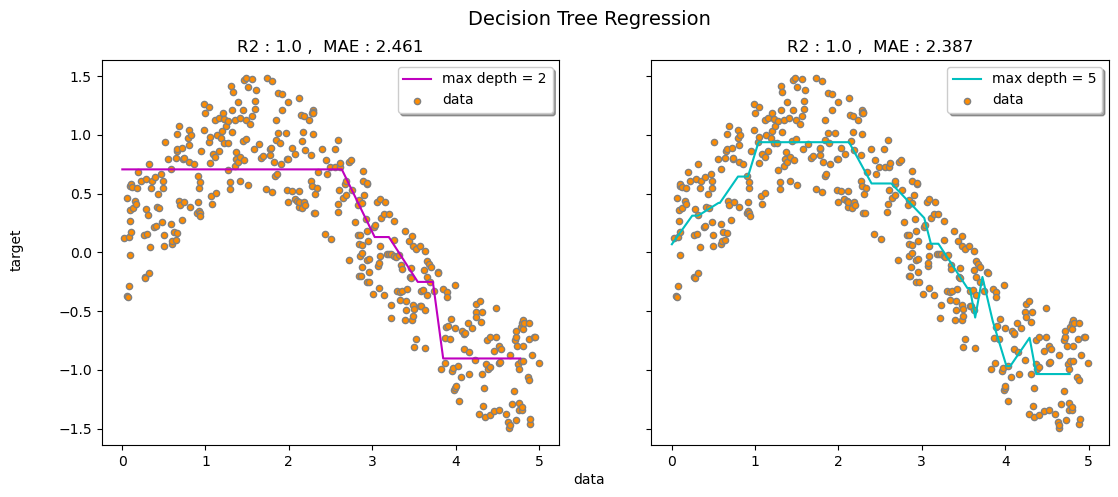

In [39]:
X_test = np.sort(5 * np.random.rand(40, 1), axis=0)

regrs=[regr_1, regr_2]
depths=["max depth = 2", "max depth = 5"]
model_color=["m", "c"]
fig, axes = plt.subplots(nrows =1, ncols =2, sharey =True, figsize =(13, 5))
for ix, regr in enumerate(regrs):
    pred = regr.fit(X,y).predict(X_test)
    r2 = regr.score(X_test, pred)
    mae=mean_absolute_error(X_test, pred)
    
    axes[ix].plot(X_test,
                  pred,
                  color=model_color[ix],
                  label="{}".format(depths[ix])
                 )
    axes[ix].scatter(X, y, 
                     s=20, 
                     edgecolor="gray", 
                     c="darkorange", 
                     label="data")
    axes[ix].legend(loc="upper right",
                   ncol=1,
                   fancybox=True,
                   shadow=True)
    axes[ix].set_title("R2 : {r} ,  MAE : {m}".format(r =round(r2,3), m =round(mae, 3)))
fig.text(0.5, 0.04, "data", ha ="center", va ="center")
fig.text(0.06, 0.5, "target", ha ="center", va ="center", rotation ="vertical")
fig.suptitle("Decision Tree Regression", fontsize =14)
plt.show()

In [14]:
# 앙상블

# 위스콘신 유방암 진단 데이터세트로 분류분석
import pandas as pd
breast = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/breast-cancer.csv")
breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<AxesSubplot: xlabel='diagnosis', ylabel='count'>

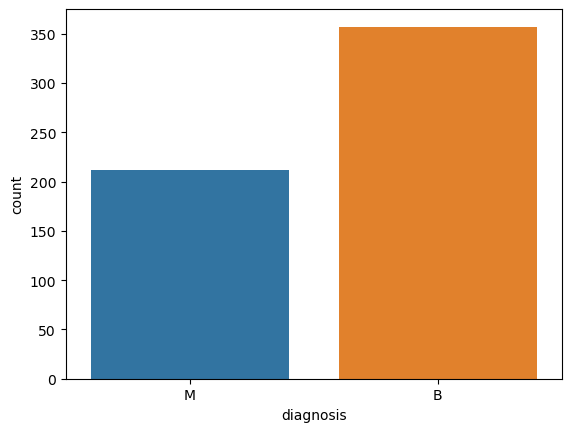

In [15]:
# diagnosis가 타깃데이터, M은 악성을 의미하며 전체 데이터의 37%를 차지, B는 양성을 의미하며 전체 데이터의 63%를 차지
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.countplot(x='diagnosis', data=breast)

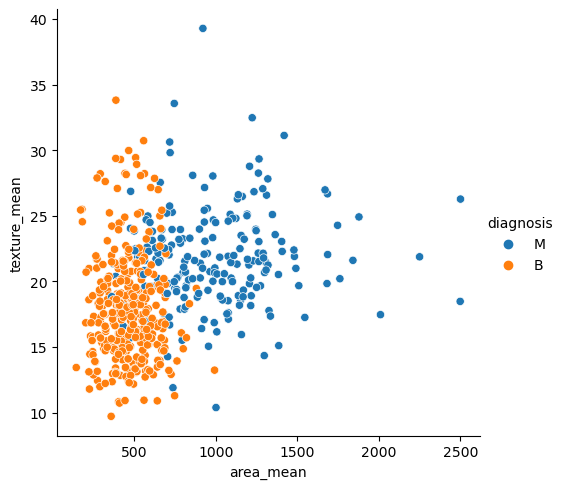

In [16]:
# 분석을 위해 breast 데이터세트중 설명변수를 area_mean, texture_mean으로 설정하고 타깃변수를 diagnosis로 설정
sns.relplot(x='area_mean', y='texture_mean', hue='diagnosis', data=breast)

In [17]:
# 범주형 종속변수를 이상형으로 변환 : diagnosis의 M은 1, M이 아니면 0으로 변환
# 학습데이터와 평가데이터를 7:3으로 분할
import numpy as np
from sklearn.model_selection import train_test_split

breast['diagnosis'] = np.where(breast['diagnosis'] == 'M', 1, 0)
features = ['area_mean', 'area_worst']

X = breast[features]
y = breast['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify = y, random_state = 1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [18]:
# BaggingClassifier를 이용하여 분류기 생성 및 예측
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator = DecisionTreeClassifier())
pred = clf.fit(x_train, y_train).predict(x_test)
print('Accuracy Score : ', clf.score(x_test, y_test))

Accuracy Score :  0.9298245614035088


In [19]:
y_test

399    0
16     1
369    1
174    0
71     0
      ..
532    0
558    0
103    0
361    0
55     0
Name: diagnosis, Length: 171, dtype: int32

In [20]:
pred

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [21]:
# 혼동행렬
from sklearn.metrics import confusion_matrix 
pd.DataFrame(confusion_matrix(y_test, pred),
             index=['True[0]', 'True[1]'],
             columns=['Pred[0]','Pred[1]'])

,Pred[0],Pred[1]
True[0],103,4
True[1],8,56


C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


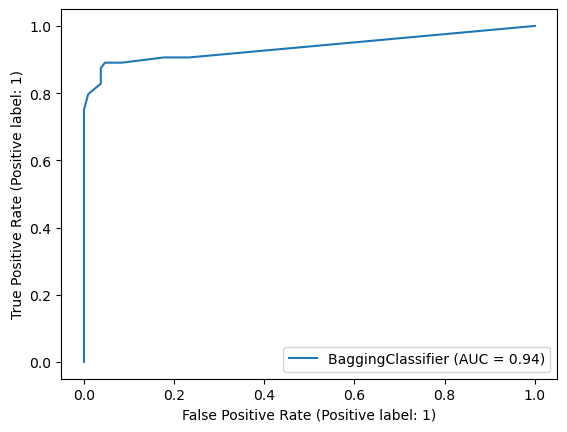

In [22]:
# ROC, AUC
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score
plot_roc_curve(clf, x_test, y_test)
plt.show()

In [24]:
# oob_score 모델 평가 : 선택되지 않은 데이터로 성능평가
clf_oob = BaggingClassifier(base_estimator = DecisionTreeClassifier(), oob_score=True)
oob = clf_oob.fit(X, y).oob_score_
print(oob)

0.8945518453427065


C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [26]:
# BaggingRegressor
# 자동차 데이터세트를 사용하여 자동차의 가격을 예측
car = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/CarPrice_Assignment.csv")
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [27]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [28]:
# 연속형 변수만 종속변수로 설정하고 price를 타깃변수로 설정
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
X = car_num[features]
y = car_num['price']
print(X.shape, y.shape)

(205, 13) (205,)


In [29]:
# 배깅을 이용해 회귀분석 모델 생성하고 oob_score 기능을 활용해 모델 평가
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
reg = BaggingRegressor(base_estimator = DecisionTreeRegressor(), oob_score=True)
reg = reg.fit(X, y)
reg.oob_score_

C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:1163: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


0.8866693434152698

In [31]:
# 부스팅 : 예측력이 약한 모형들을 결합해 강한 예측모형을 만드는 방법
import pandas as pd
breast = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/breast-cancer.csv")

import numpy as np
from sklearn.model_selection import train_test_split
breast['diagnosis'] = np.where(breast['diagnosis'] == 'M', 1, 0)
features = ['area_mean', 'texture_mean']
X = breast[features]
y = breast['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify= y , random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [32]:
# 부스트 방식 AdaBoostClassifier로 모델 학습
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=None)
pred = clf.fit(x_train, y_train).predict(x_test)
print("정확도 : ", clf.score(x_test, y_test))

정확도 :  0.9122807017543859


In [33]:
# 부스팅모델의 예측성능 확인
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(x_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print("\n")
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))

[[102   5]
 [ 10  54]]


정확도	91.23%
정밀도	91.53%
재현율	84.38%
F1	87.8%


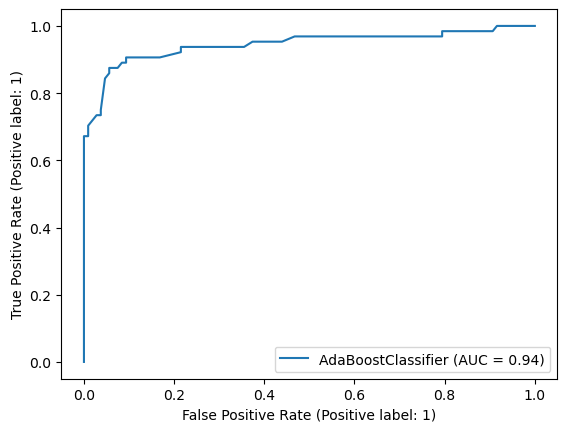

In [34]:
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_roc_curve, roc_auc_score  # 최신버전에서 아래와 같이 바뀌었음
from sklearn.metrics import RocCurveDisplay, roc_auc_score
#plot_roc_curve(clf, X_test, y_test)                         # 최신버전에서 아래와 같이 바뀌었음
RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()

In [35]:
# 중요한 변수가 무엇이었는지 확인
importances = clf.feature_importances_
column_nm = pd.DataFrame(['area_mean', 'texture_mean'])
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

     feature_nm  importances
0     area_mean         0.56
1  texture_mean         0.44


<BarContainer object of 2 artists>

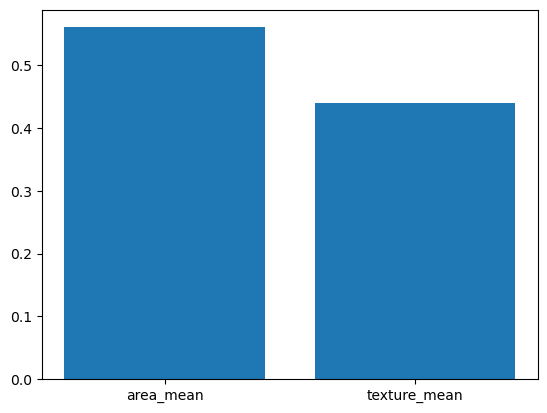

In [36]:
# 변수중요도를 막대그래프로 시각화
f = features
xtick_label_position = list(range(len(f)))
plt.xticks(xtick_label_position, f)
plt.bar([x for x in range(len(importances))], importances)

In [39]:
# AdaBoostRegressor : 부스트방식의 회귀분석
import pandas as pd
car = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/CarPrice_Assignment.csv")
car


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [41]:
car_num = car.select_dtypes(['number'])  # 자료형이 숫자인 컬럼만 선택, int, float로 되어 있는 컬럼들만 모아둔 데이터프레임을 만들겠다는 의미
car_num

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [43]:
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
X = car_num[features]
y = car_num['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143, 13) (62, 13) (143,) (62,)


In [47]:
# AdaBoostRegressor를 이용한 회귀분석 시행
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor(base_estimator=None)
pred = reg.fit(x_train, y_train).predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc*100,3)))


MSE	5551419.506
MAE	1786.073
RMSE	2356.145
ACC	90.804%


In [48]:
# 변수 중요도
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

          feature_nm  importances
0          boreratio     0.013152
1          carheight     0.006348
2          carlength     0.014895
3           carwidth     0.073383
4            citympg     0.004523
5   compressionratio     0.002528
6         curbweight     0.066289
7         enginesize     0.613952
8         highwaympg     0.052928
9         horsepower     0.104085
10           peakrpm     0.009795
11            stroke     0.007985
12         wheelbase     0.030137


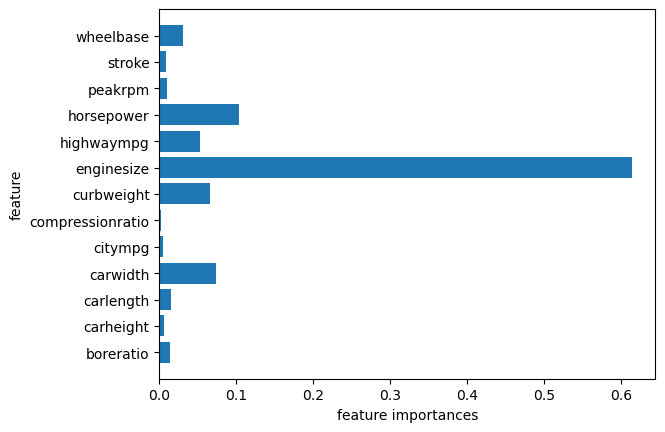

In [50]:
# 막대그래프로 시각화
n_features = x_train.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features), importances, align='center')
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel('feature importances')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()